# Customer churn analysis

## Understand the problem first
- understand the bussiness problem
- understand the data

### Importing the relevant library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set()

### Importing the dataset

In [6]:
df = pd.read_csv(r"C:\Users\satya\0. Study material\Datasets (Internet)\satyajit pattnaik\CustomerChurn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- look at the top 5 values

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### check the various attributes of data like 
- shape (rows, columns)
- columns
- datatypes

In [10]:
df.shape

(7043, 21)

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- checking the data type of all variables

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- checking the data type of all variables as well as null values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# checking the descriptive statistics of numerical variable

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Senior citizen is actually a categorical hence the 25%-50%-75% distribution is not proper
- 75% customers have tenure less than 55 months average monthly charges are $64.76 
- where as 25% customers pays more than \\$89.85 per months

In [18]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Text(0.5, -0.22, 'Fig : Count of target variable per category')

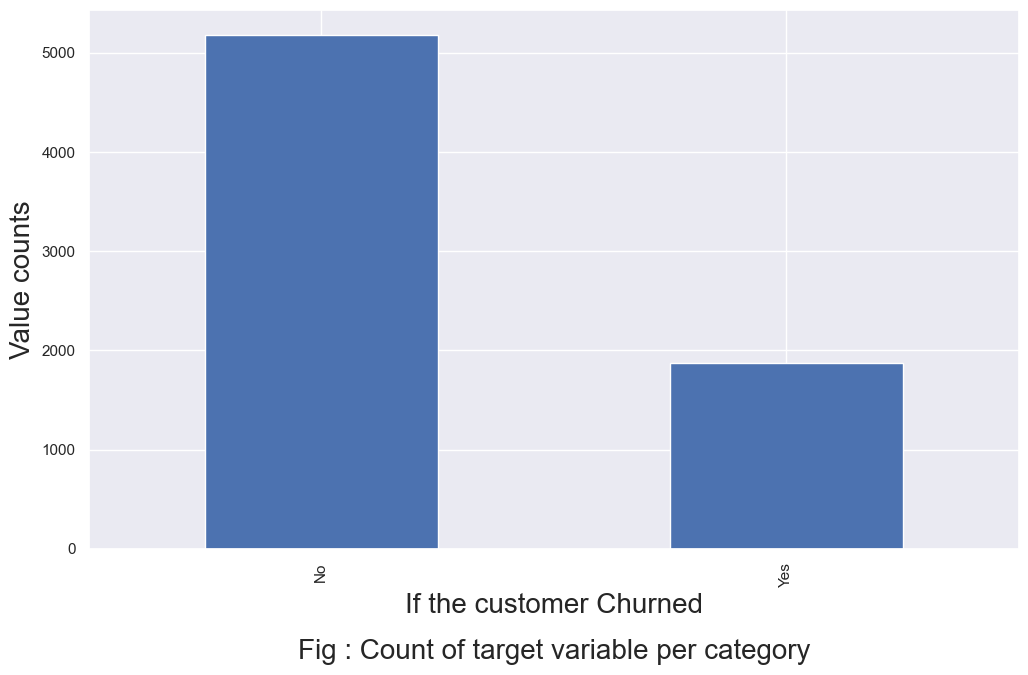

In [19]:
df['Churn'].value_counts().plot(kind='bar', figsize=(12, 7))
plt.xlabel("If the customer Churned", fontsize=20)
plt.ylabel("Value counts", fontsize=20)
plt.title("Fig : Count of target variable per category", y=-0.22, fontsize=20)

Text(0.5, 1.02, 'Fig : Count of target variable per category')

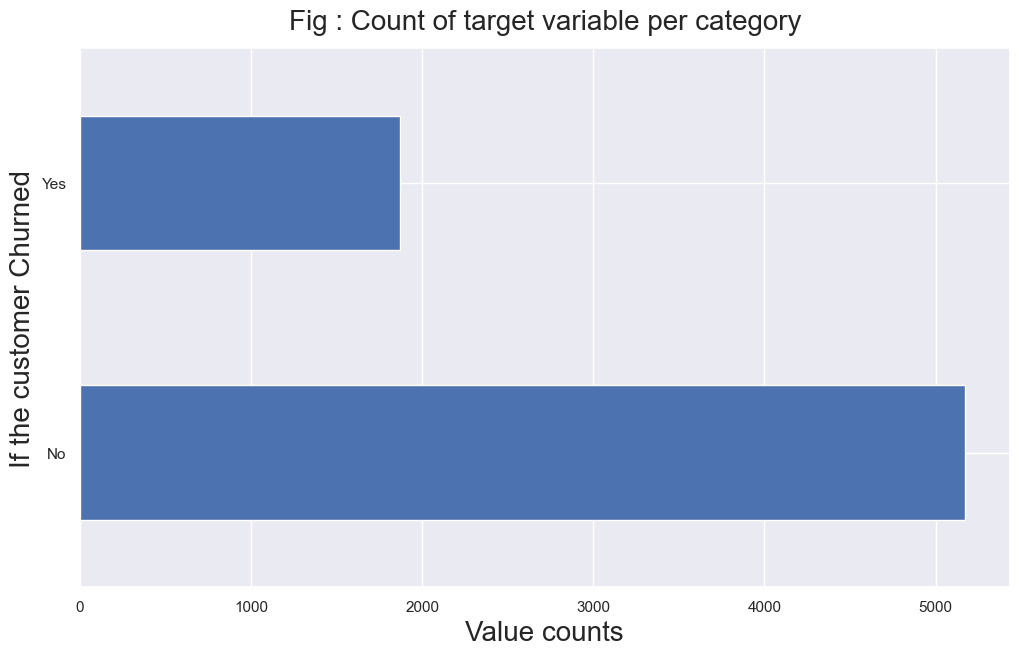

In [20]:
df['Churn'].value_counts().plot(kind='barh', figsize=(12, 7))
plt.ylabel("If the customer Churned", fontsize=20)
plt.xlabel("Value counts", fontsize=20)
plt.title("Fig : Count of target variable per category", y=1.02, fontsize=20)

- Data is highly imbalanced, ratio = 73:27
- So we analyse the data with other features while taking the target values separated to get some insights

In [22]:
# concise summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


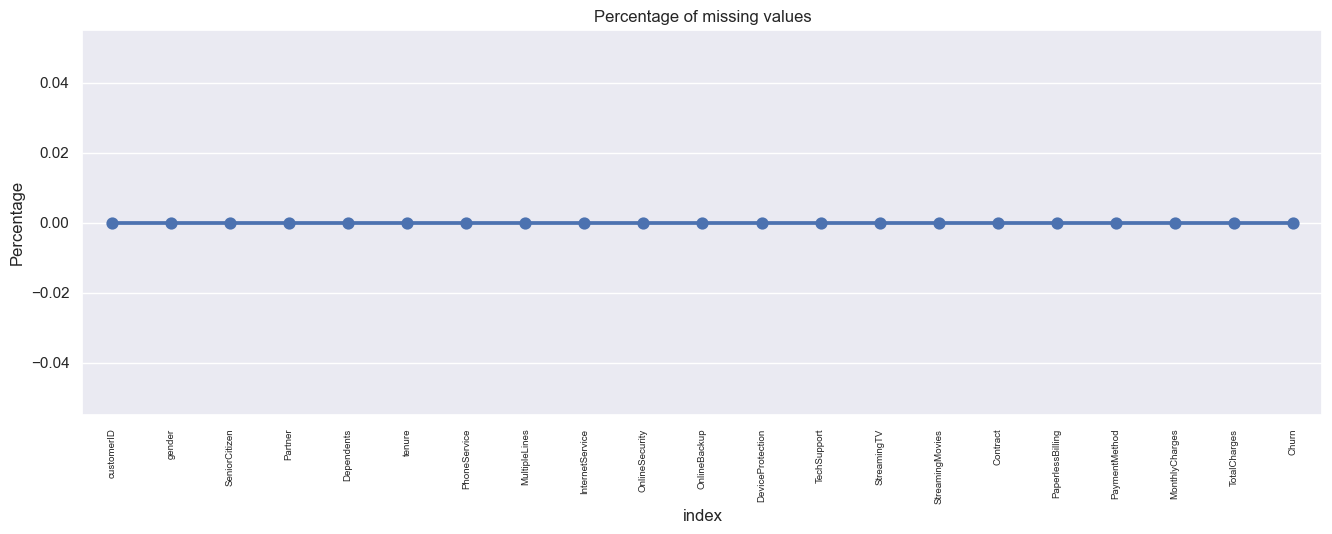

In [23]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x=missing['index'], y=missing[0], data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()

### Missing Data - Initial Intuition

- Here, we don't have any missing data.

General Thumb Rules:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, s_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely

### ⚪ Data Cleaning

**1.** Create a copy of base data for manipulation and processing

In [27]:
new_df = df.copy()

In [28]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**2.** Total charge should be numeric

In [31]:
new_df['TotalCharges'] = pd.to_numeric(new_df.TotalCharges, errors='coerce')

In [32]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are only 11 missing values in TotalCharges columns. Let's check these records.

In [36]:
new_df.loc[new_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4.** Missing Value Treatment

Since the % of these records compared to total dataset is very low i.e .15%, it is safe to ignore them from futher processing.

In [38]:
new_df.dropna(inplace=True)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [40]:
new_df['tenure'].value_counts().sort_index()

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 72, dtype: int64

In [41]:
new_df.tenure.max()

72

In [42]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
new_df['tenure_group'] = pd.cut(new_df['tenure'], bins = [i for i in range(1, 80, 12)], labels=labels, include_lowest=True)


In [43]:
new_df['tenure_group'].value_counts().sort_index()

tenure_group
1 - 12     2284
13 - 24     994
25 - 36     818
37 - 48     763
49 - 60     842
61 - 72    1331
Name: count, dtype: int64

**6.** Remove the columns not required for processing

In [45]:
new_df.drop(['customerID', 'tenure'], axis=1, inplace=True)

In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

### Data Exploration

***1.*** Plot distribution of individual predictors by churn

#### Univariate Analysis

In [50]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [51]:
list(enumerate(new_df.drop(['MonthlyCharges',	'TotalCharges',	'Churn'], axis=1)))

[(0, 'gender'),
 (1, 'SeniorCitizen'),
 (2, 'Partner'),
 (3, 'Dependents'),
 (4, 'PhoneService'),
 (5, 'MultipleLines'),
 (6, 'InternetService'),
 (7, 'OnlineSecurity'),
 (8, 'OnlineBackup'),
 (9, 'DeviceProtection'),
 (10, 'TechSupport'),
 (11, 'StreamingTV'),
 (12, 'StreamingMovies'),
 (13, 'Contract'),
 (14, 'PaperlessBilling'),
 (15, 'PaymentMethod'),
 (16, 'tenure_group')]

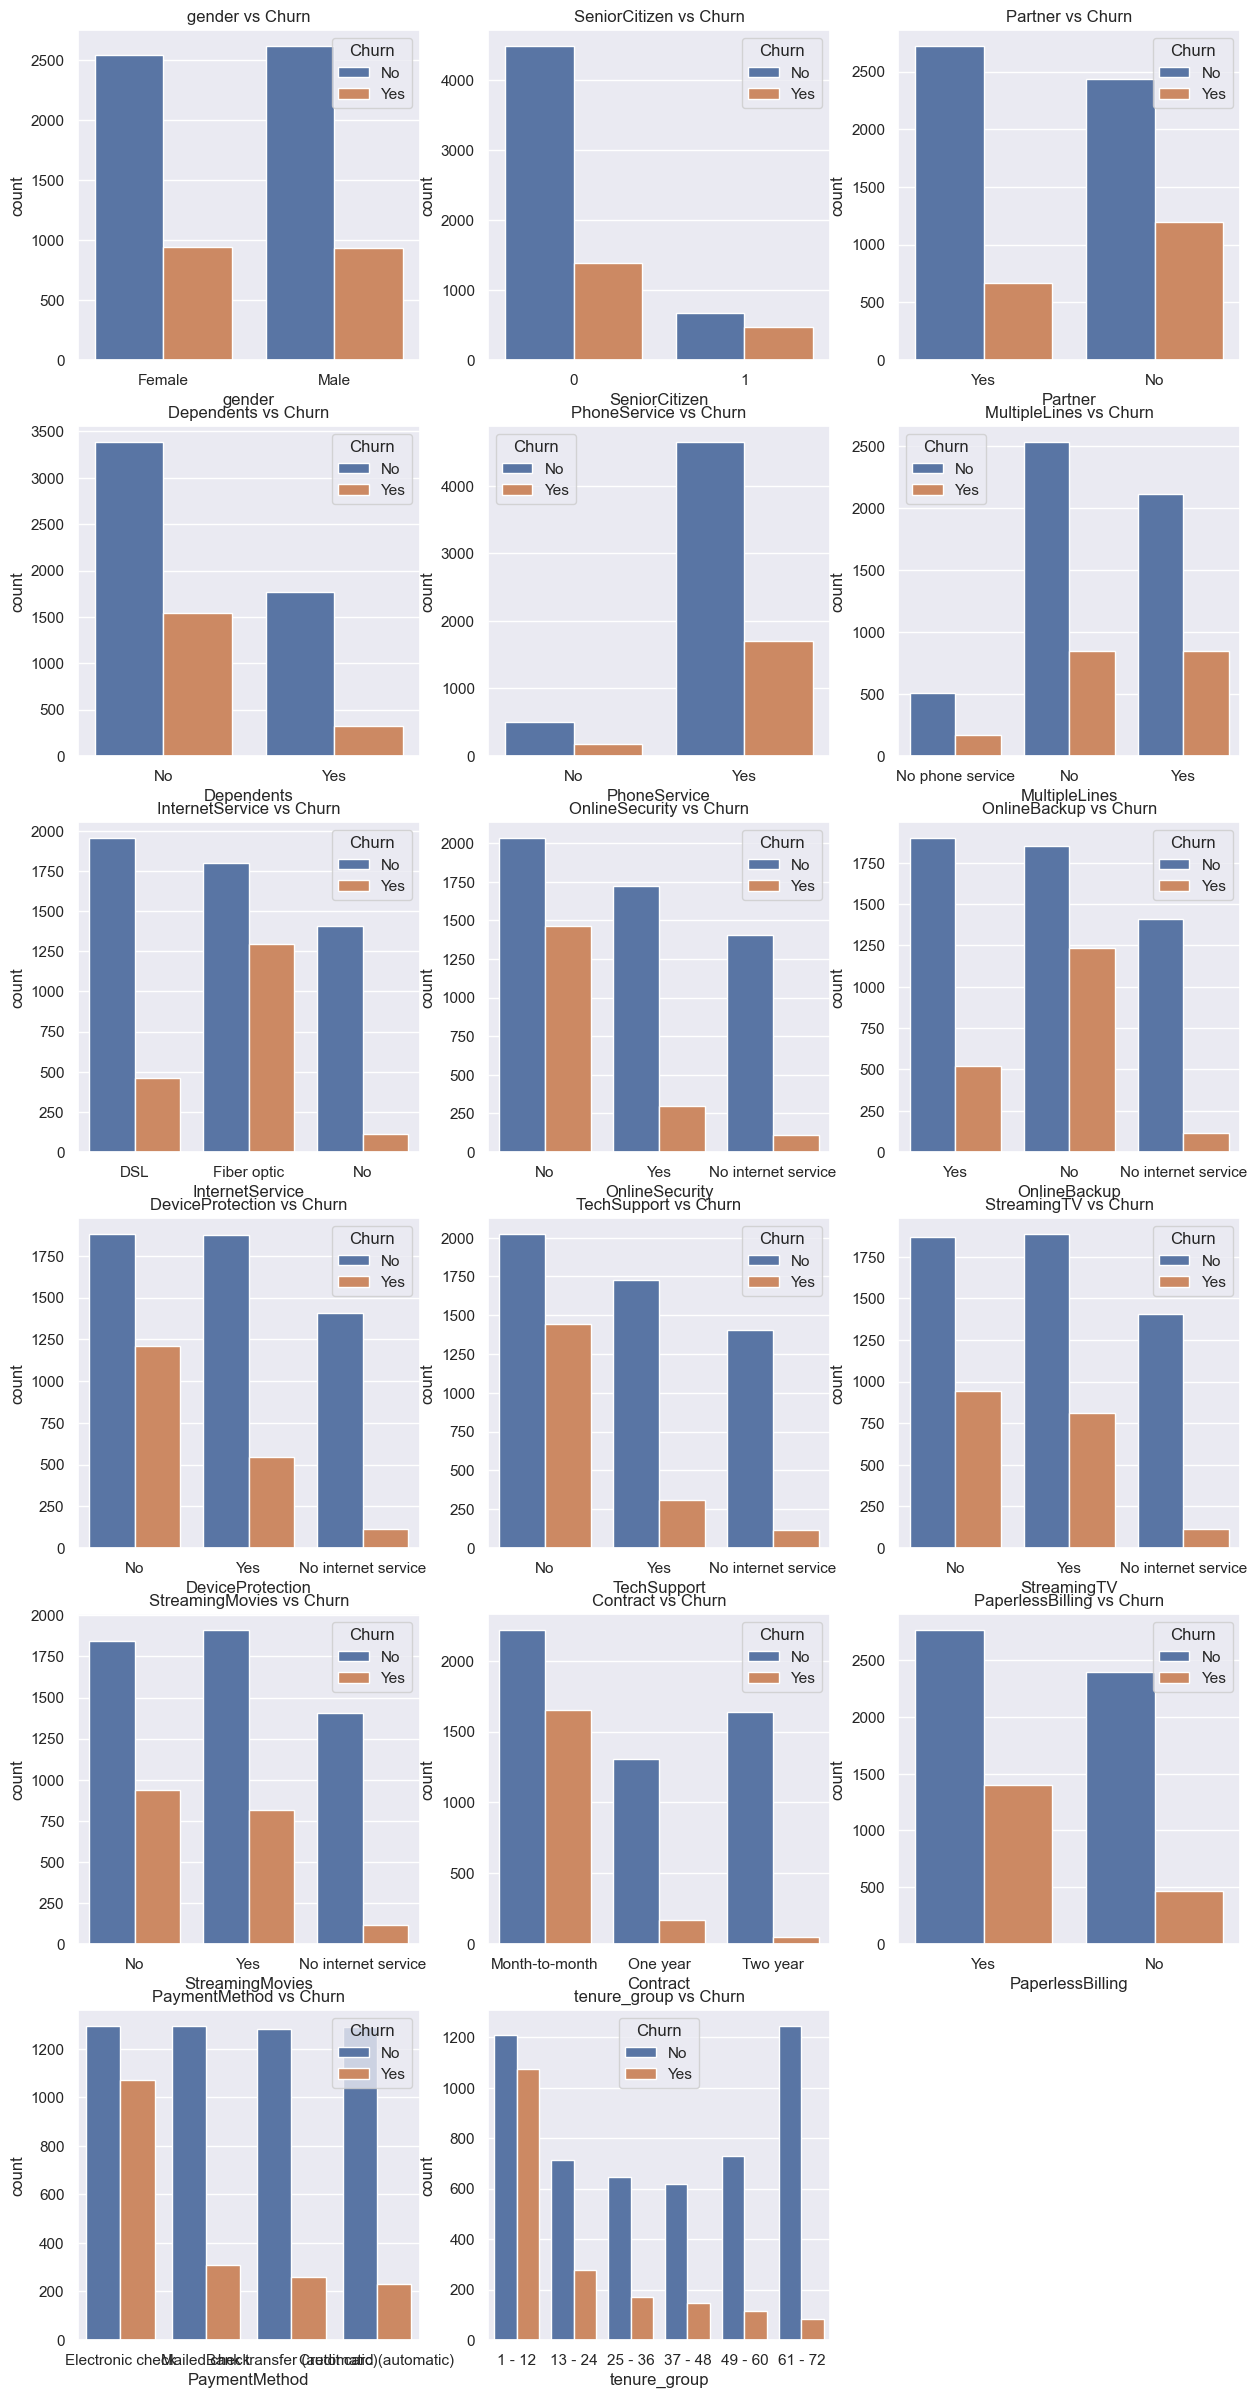

In [52]:
plt.figure(figsize=(15, 30))
for i, predictor in enumerate(new_df.drop(['MonthlyCharges',	'TotalCharges',	'Churn'], axis=1)):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=new_df, x=predictor, hue='Churn')
    plt.title(f'{predictor} vs Churn')

**1.** Senior citizen are more likely to churn

**2.** People with no patners are more likely to churn

### Numerical analysis

In [55]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [56]:
new_df1_target0 = new_df[new_df['Churn'] == "No"]
new_df1_target1 = new_df[new_df['Churn'] == "Yes"]

In [57]:
print(f"For churn is No \n{new_df1_target0.gender.value_counts()}\n\n")
print(f"For churn is Yes \n{new_df1_target1.gender.value_counts()}")

For churn is No 
gender
Male      2619
Female    2544
Name: count, dtype: int64


For churn is Yes 
gender
Female    939
Male      930
Name: count, dtype: int64


In [58]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


**2.** Convert the target variable "Churn" in a binary numerical variable i.e "Yes" : 1, "No":0

In [60]:
new_df['Churn'] = np.where(new_df['Churn'] == 'Yes', 1, 0)

In [61]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variable into numerical/Dummies one

In [63]:
new_df_dummies = pd.get_dummies(new_df, dtype=int)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**9.** Relationship between Monthly charges and Total charges

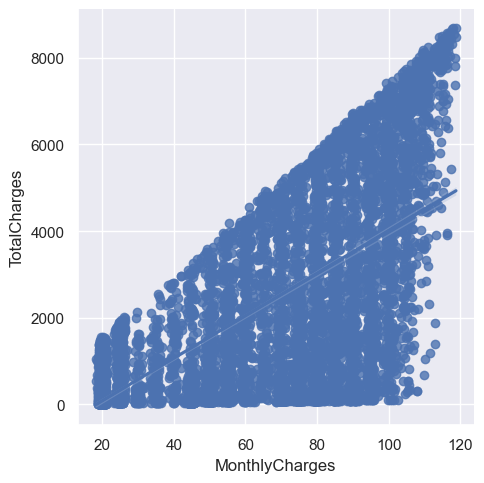

In [65]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y =	'TotalCharges')

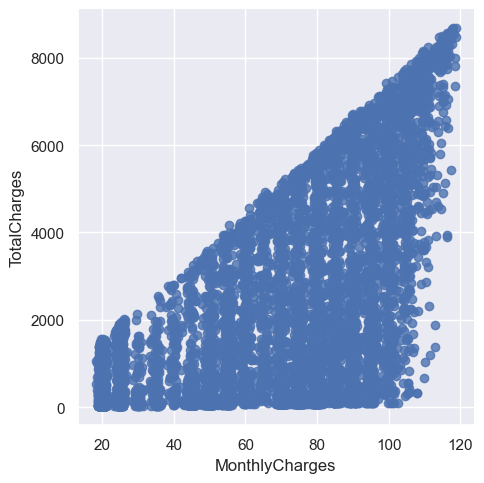

In [66]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y =	'TotalCharges', fit_reg=False)

In [67]:
new_df_dummies.MonthlyCharges.corr(new_df_dummies.TotalCharges)

0.6510648032262024

Total charges increase as Monthly charges increase - as expected

**10.** Churn by Monthly charges and Total charges

C:\Users\satya\AppData\Local\Temp\ipykernel_6800\633426860.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mon = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn'] == 0)], color='Red', shade=True)
C:\Users\satya\AppData\Local\Temp\ipykernel_6800\633426860.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mon = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn'] == 1)], color='Blue', shade=True)


Text(0.5, 1.0, 'Monthly charges by churn')

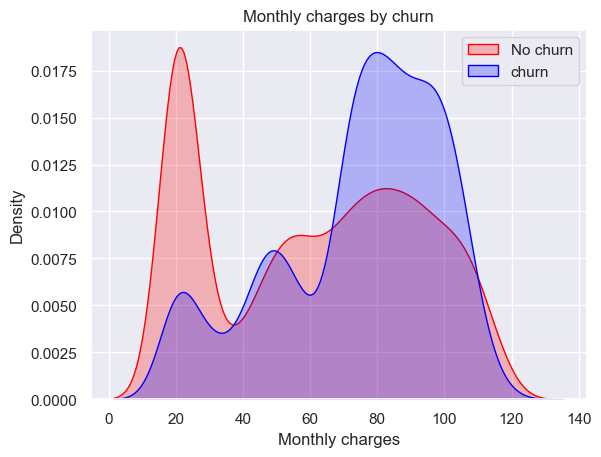

In [70]:
mon = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn'] == 0)], color='Red', shade=True)
mon = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn'] == 1)], color='Blue', shade=True)

mon.legend(['No churn', 'churn'], loc='upper right')
mon.set_xlabel('Monthly charges')
mon.set_ylabel("Density")
mon.set_title("Monthly charges by churn")

C:\Users\satya\AppData\Local\Temp\ipykernel_6800\4255747538.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn'] == 0)], color='Red', shade=True)
C:\Users\satya\AppData\Local\Temp\ipykernel_6800\4255747538.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn'] == 1)], color='Blue', shade=True)


Text(0.5, 1.0, 'Total charges by churn')

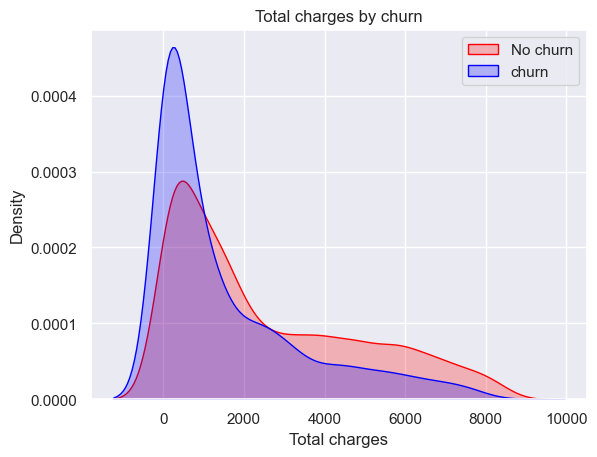

In [71]:
tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn'] == 0)], color='Red', shade=True)
tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn'] == 1)], color='Blue', shade=True)

tot.legend(['No churn', 'churn'], loc='upper right')
tot.set_xlabel('Total charges')
tot.set_ylabel("Density")
tot.set_title("Total charges by churn")

<Axes: >

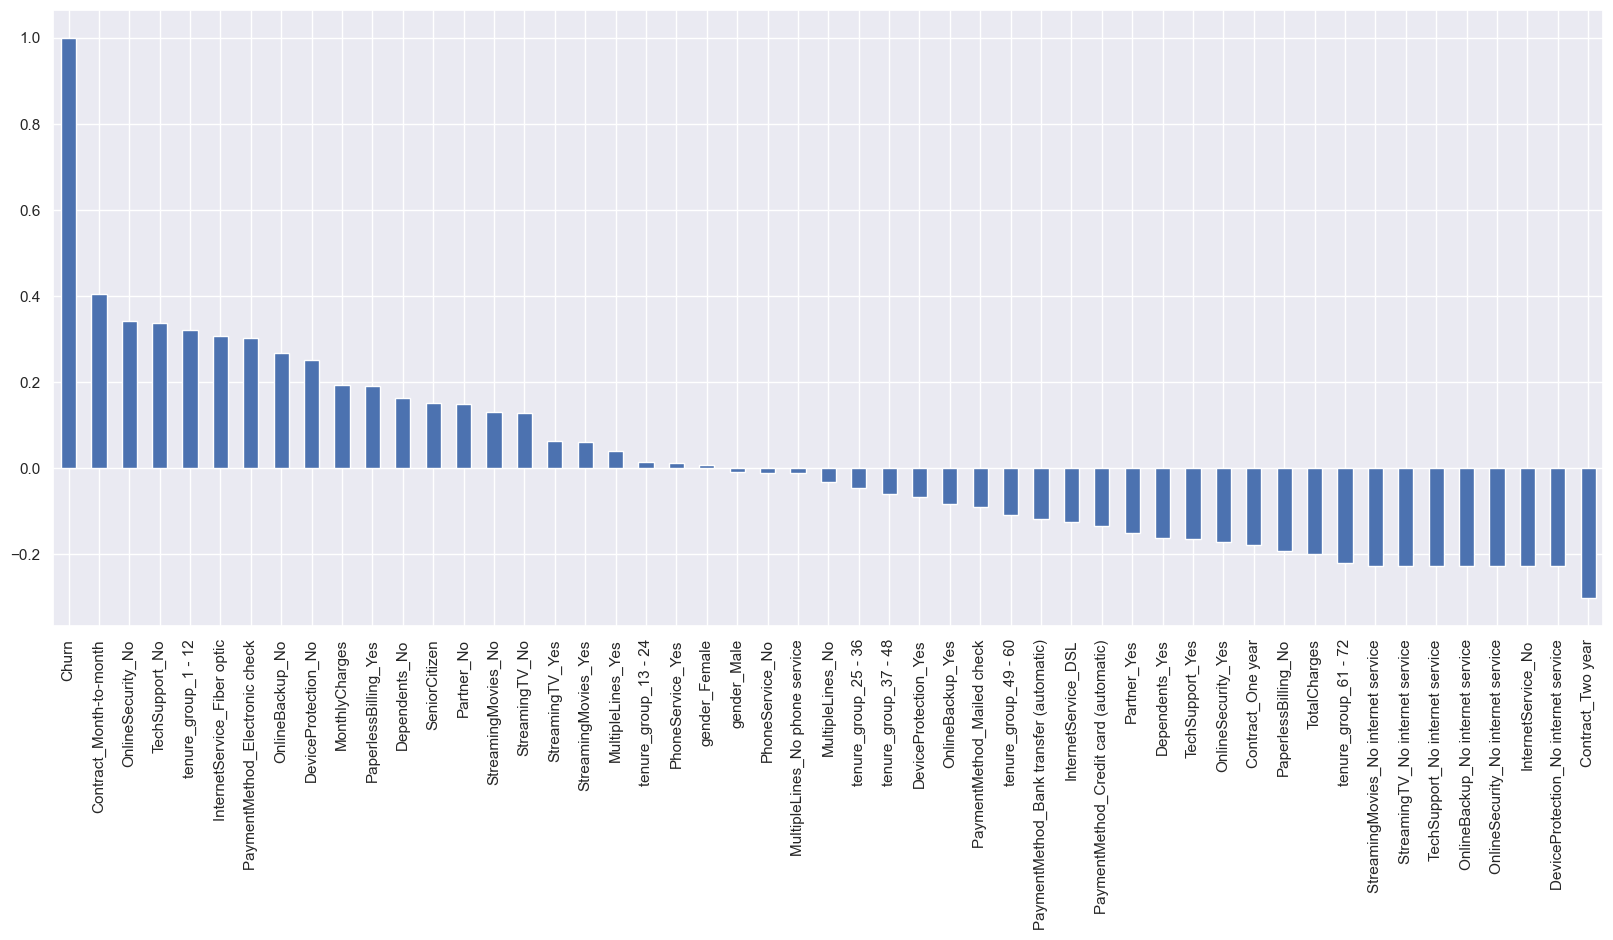

In [127]:
plt.figure(figsize=(20, 8))
new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

### Bivariate Analysis

In [133]:
new_df1_target0 = new_df[new_df['Churn'] == 0]
new_df1_target1 = new_df[new_df['Churn'] == 1]

In [137]:
len(new_df1_target0)

5163

In [139]:
len(new_df1_target1)

1869

In [157]:
def uniplot(df, col, title, hue=None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data=hue)

    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)

    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    plt.show()

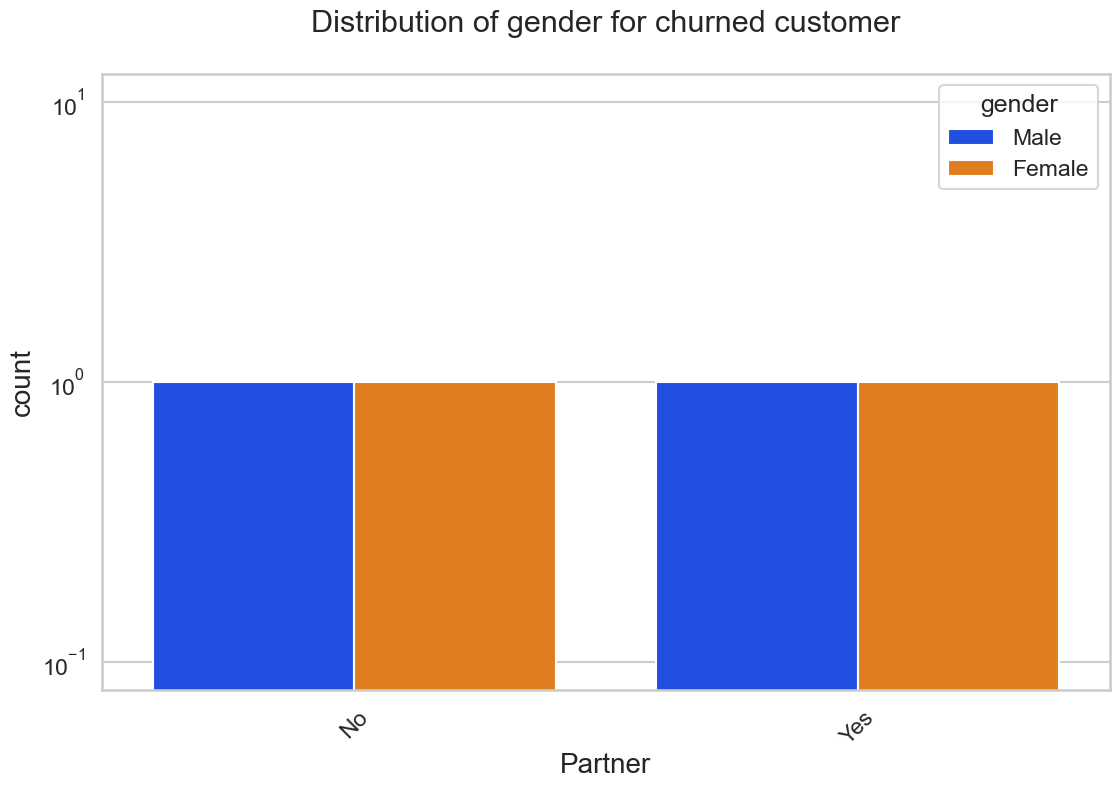

In [159]:
uniplot(new_df1_target1, col='Partner', title='Distribution of gender for churned customer', hue='gender')


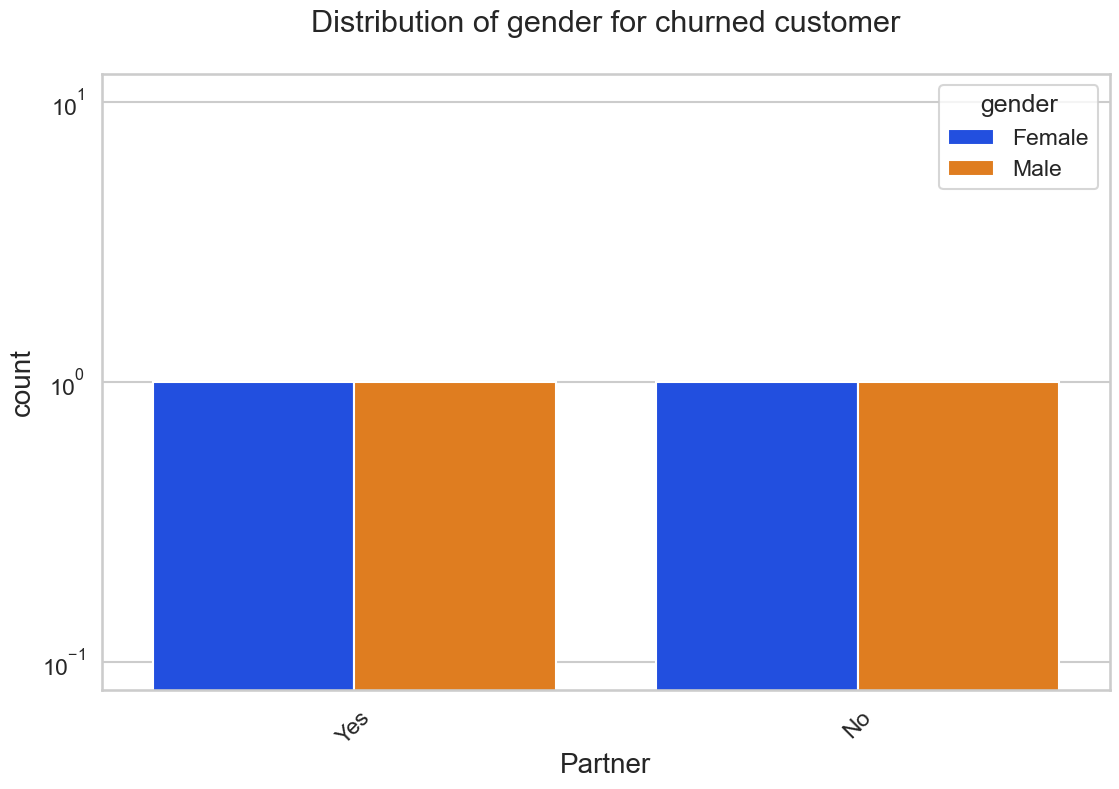

In [161]:
uniplot(new_df1_target0, col='Partner', title='Distribution of gender for churned customer', hue='gender')


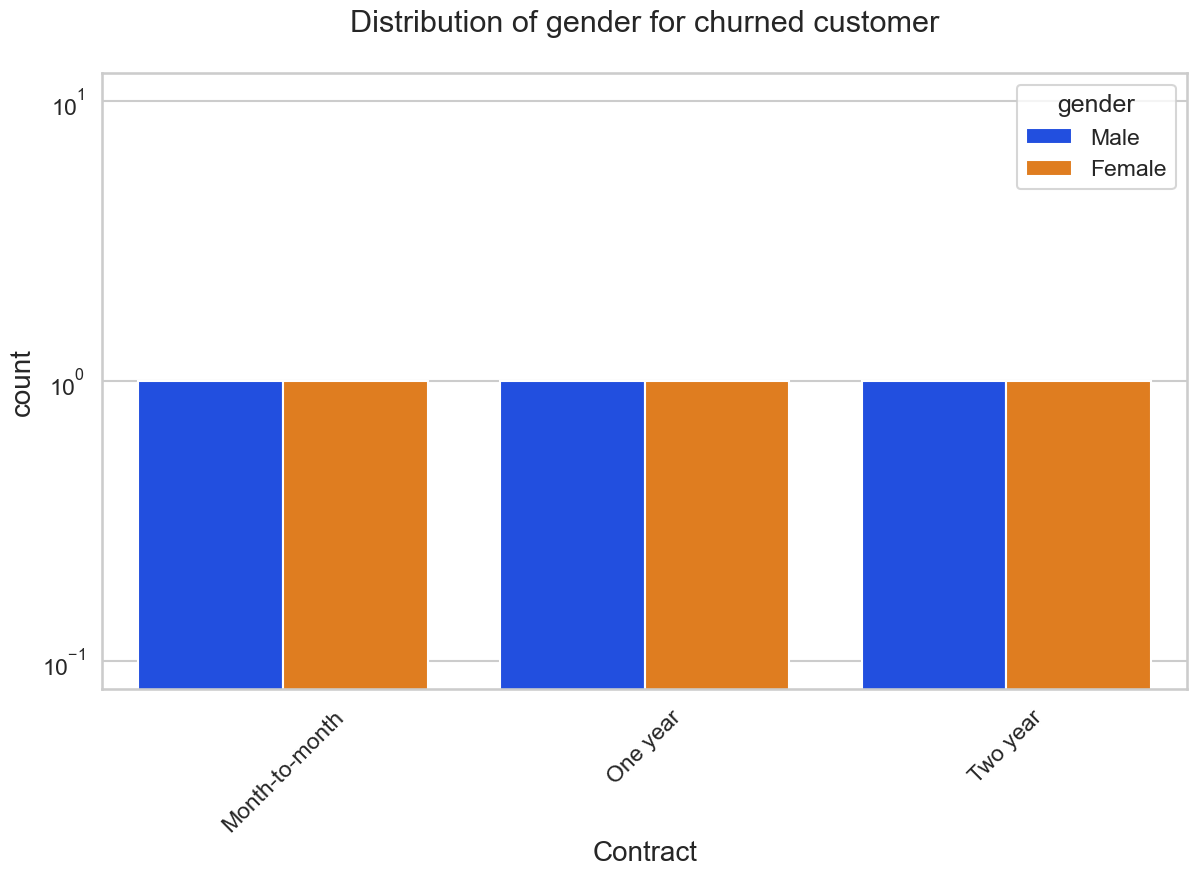

In [163]:
uniplot(new_df1_target1, col='Contract', title='Distribution of gender for churned customer', hue='gender')


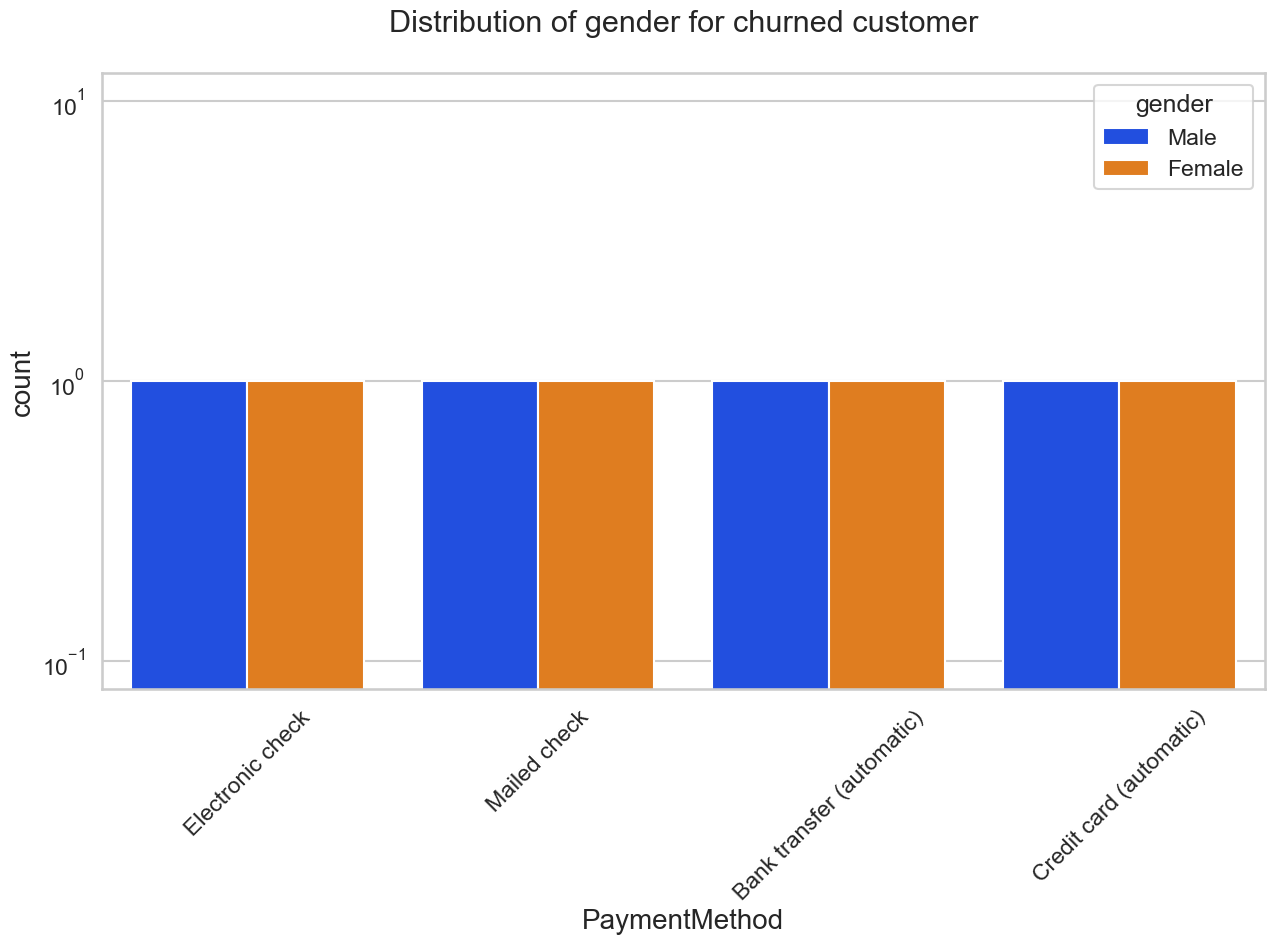

In [165]:
uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of gender for churned customer', hue='gender')
